In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [8]:
link = r"C:\Users\paula\Desktop\Thesis\B&R chi sqr - To download.xlsx"
df = pd.read_excel(link)

Definitions:

Groups = IntentionNoAction, NoIntentionNoAction, IntentionAndAction

Elements = Gender, Ethnicity, Parental Status, Education, Climate Change Impact and Level of Action

### Descriptive statistics for each group and elements

In [9]:
# Descriptive Education statistics for each group
Education_stats = {
    'IntentionNoAction': df[df['IntentionNoAction'] == 1]['Education'].describe(),
    'NoIntentionNoAction': df[df['NoIntentionNoAction'] == 1]['Education'].describe(),
    'IntentionAndAction': df[df['IntentionAndAction'] == 1]['Education'].describe(),
}

print(Education_stats)

{'IntentionNoAction': count    212.000000
mean       2.698113
std        0.950628
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Education, dtype: float64, 'NoIntentionNoAction': count    563.000000
mean       2.481350
std        0.998713
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Education, dtype: float64, 'IntentionAndAction': count    65.000000
mean      3.000000
std       0.829156
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: Education, dtype: float64}


In [10]:
# Descriptive Climate Change impact statistics for each group
CC_impact_stats = {
    'IntentionNoAction': df[df['IntentionNoAction'] == 1]['Climate Change Impact'].describe(),
    'NoIntentionNoAction': df[df['NoIntentionNoAction'] == 1]['Climate Change Impact'].describe(),
    'IntentionAndAction': df[df['IntentionAndAction'] == 1]['Climate Change Impact'].describe(),
}

print(CC_impact_stats)

{'IntentionNoAction': count    212.000000
mean       3.056604
std        0.782876
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Climate Change Impact, dtype: float64, 'NoIntentionNoAction': count    563.000000
mean       2.486679
std        0.926719
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Climate Change Impact, dtype: float64, 'IntentionAndAction': count    65.000000
mean      3.246154
std       0.866580
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: Climate Change Impact, dtype: float64}


In [11]:
# Descriptive Level of action statistics for each group
Level_action = {
    'IntentionNoAction': df[df['IntentionNoAction'] == 1]['Level of action'].describe(),
    'NoIntentionNoAction': df[df['NoIntentionNoAction'] == 1]['Level of action'].describe(),
    'IntentionAndAction': df[df['IntentionAndAction'] == 1]['Level of action'].describe(),
}

print(Level_action)

{'IntentionNoAction': count    212.000000
mean       2.226415
std        1.170596
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Level of action, dtype: float64, 'NoIntentionNoAction': count    563.000000
mean       1.889876
std        0.949969
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Level of action, dtype: float64, 'IntentionAndAction': count    65.000000
mean      2.753846
std       1.173014
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: Level of action, dtype: float64}


### Frequency distributions

In [12]:
# Frequency distribution of Education by group
education_distribution_by_group = df.groupby(['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction'])['Education'].value_counts().unstack().fillna(0)
print("Education Distribution by Group:")
print(education_distribution_by_group)

# Frequency distribution of Climate Change Impact by group
climate_change_distribution_by_group = df.groupby(['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction'])['Climate Change Impact'].value_counts().unstack().fillna(0)
print("\nClimate Change Impact Distribution by Group:")
print(climate_change_distribution_by_group)

# Frequency distribution of Level of Action by group
level_of_action_distribution_by_group = df.groupby(['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction'])['Level of action'].value_counts().unstack().fillna(0)
print("\nLevel of Action Distribution by Group:")
print(level_of_action_distribution_by_group)

Education Distribution by Group:
Education                                                   1    2    3   4
IntentionNoAction NoIntentionNoAction IntentionAndAction                   
0                 0                   0                     4    4    9   1
                                      1                     4   10   33  18
                  1                   0                   117  151  202  93
1                 0                   0                    29   50   89  44

Climate Change Impact Distribution by Group:
Climate Change Impact                                       1    2    3   4
IntentionNoAction NoIntentionNoAction IntentionAndAction                   
0                 0                   0                     1    4    6   7
                                      1                     5    3   28  29
                  1                   0                   100  160  232  71
1                 0                   0                     6   41  100  65

Level of

### Chi-Square Test

In [13]:
# Define the groups as columns
groups = ['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction']

# Define the sociodemographic variables
socio_vars = ['Female', '18-35', "White", "African American", "USH", "Parental Status", 'Education', 'Climate Change Impact', 'Level of action']

# Dictionary to store results
results = {}

for var in socio_vars:
    print(f"\nChi-Square Test for {var} across groups:")
    for group in groups:
        # Create contingency table for each group column
        contingency_table = pd.crosstab(df[var], df[group])
        
        # Perform Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Check expected frequencies
        if (expected < 5).any():
            print(f"Warning: Low expected frequencies in contingency table for {var} and {group}")
        
        # Store results
        results[(var, group)] = {
            'Chi-Square Statistic': chi2_stat,
            'p-value': p_value
        }
        
        # Print results
        print(f'Group: {group}')
        print(f'Chi-Square Statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}')


Chi-Square Test for Female across groups:
Group: IntentionNoAction
Chi-Square Statistic: 0.1133, p-value: 0.7365
Group: NoIntentionNoAction
Chi-Square Statistic: 0.1687, p-value: 0.6812
Group: IntentionAndAction
Chi-Square Statistic: 0.7972, p-value: 0.3719

Chi-Square Test for 18-35 across groups:
Group: IntentionNoAction
Chi-Square Statistic: 7.8928, p-value: 0.0050
Group: NoIntentionNoAction
Chi-Square Statistic: 2.8947, p-value: 0.0889
Group: IntentionAndAction
Chi-Square Statistic: 6.3203, p-value: 0.0119

Chi-Square Test for White across groups:
Group: IntentionNoAction
Chi-Square Statistic: 2.1001, p-value: 0.1473
Group: NoIntentionNoAction
Chi-Square Statistic: 7.7643, p-value: 0.0053
Group: IntentionAndAction
Chi-Square Statistic: 2.9009, p-value: 0.0885

Chi-Square Test for African American across groups:
Group: IntentionNoAction
Chi-Square Statistic: 3.0594, p-value: 0.0803
Group: NoIntentionNoAction
Chi-Square Statistic: 4.4793, p-value: 0.0343
Group: IntentionAndAction
Ch

### Contingency tables

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define the groups as columns
groups = ['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction']

# Define the sociodemographic variables
socio_vars = ['Female', '18-35', "White", "African American", "USH", "Parental Status", 'Education', 'Climate Change Impact', 'Level of action']

# List to store results
results = []

for var in socio_vars:
    for group in groups:
        # Create contingency table for each group column
        contingency_table = pd.crosstab(df[var], df[group])
        
        # Perform Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Check expected frequencies
        if (expected < 5).any():
            print(f"Warning: Low expected frequencies in contingency table for {var} and {group}")
        
        # Determine significance
        significance = 'Significant' if p_value < 0.05 else 'Not Significant'
        
        # Store results
        results.append({
            'Variable': var,
            'Group': group,
            'p-value': p_value,
            'Significance': significance
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)


                 Variable                Group       p-value     Significance
0                  Female    IntentionNoAction  7.364722e-01  Not Significant
1                  Female  NoIntentionNoAction  6.812411e-01  Not Significant
2                  Female   IntentionAndAction  3.719310e-01  Not Significant
3                   18-35    IntentionNoAction  4.963090e-03      Significant
4                   18-35  NoIntentionNoAction  8.887045e-02  Not Significant
5                   18-35   IntentionAndAction  1.193603e-02      Significant
6                   White    IntentionNoAction  1.472922e-01  Not Significant
7                   White  NoIntentionNoAction  5.328982e-03      Significant
8                   White   IntentionAndAction  8.852758e-02  Not Significant
9        African American    IntentionNoAction  8.027112e-02  Not Significant
10       African American  NoIntentionNoAction  3.430872e-02      Significant
11       African American   IntentionAndAction  7.711998e-01  No

### Contingency tables


Chi-Square Test for Female across groups:
Group: IntentionNoAction
Chi-Square Statistic: 0.1133, p-value: 0.7365


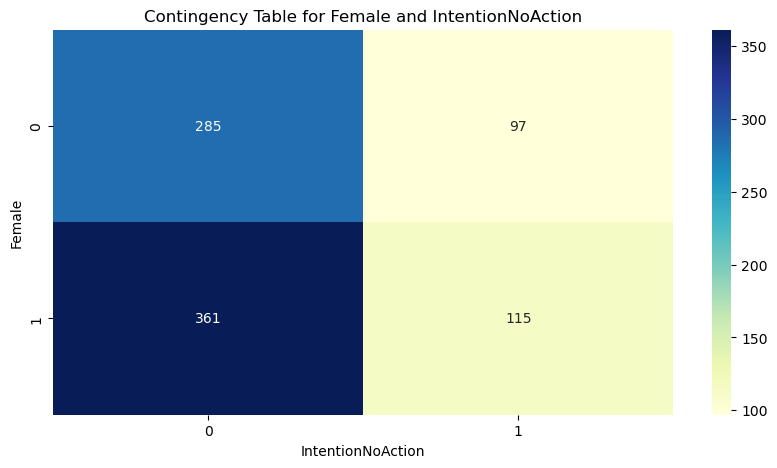

Group: NoIntentionNoAction
Chi-Square Statistic: 0.1687, p-value: 0.6812


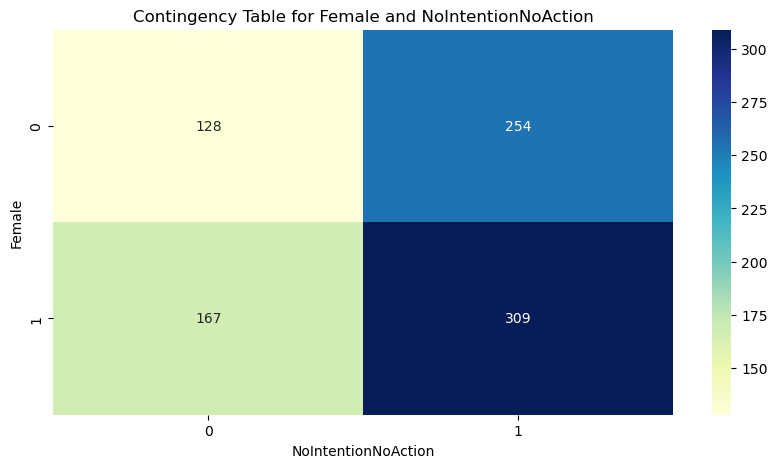

Group: IntentionAndAction
Chi-Square Statistic: 0.7972, p-value: 0.3719


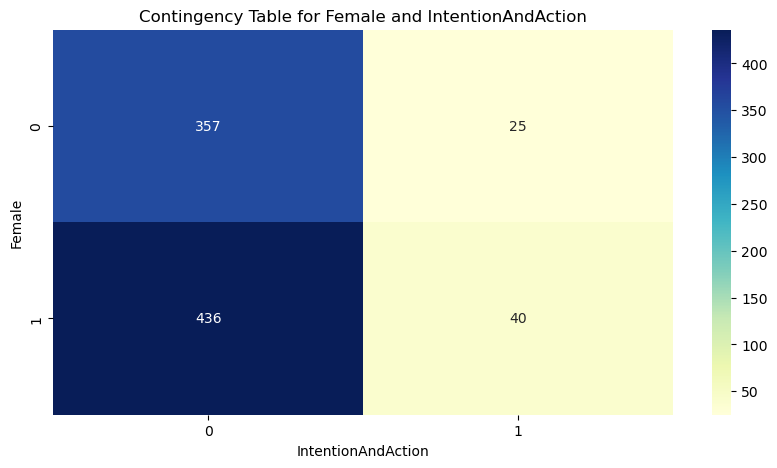


Chi-Square Test for 18-35 across groups:
Group: IntentionNoAction
Chi-Square Statistic: 7.8928, p-value: 0.0050


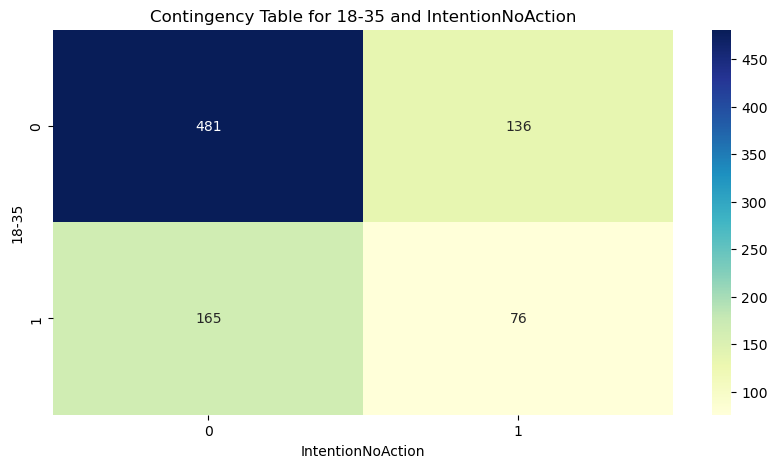

Group: NoIntentionNoAction
Chi-Square Statistic: 2.8947, p-value: 0.0889


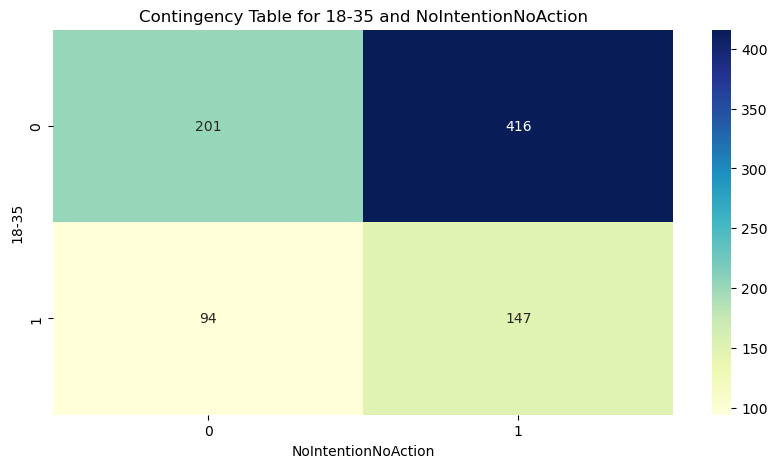

Group: IntentionAndAction
Chi-Square Statistic: 6.3203, p-value: 0.0119


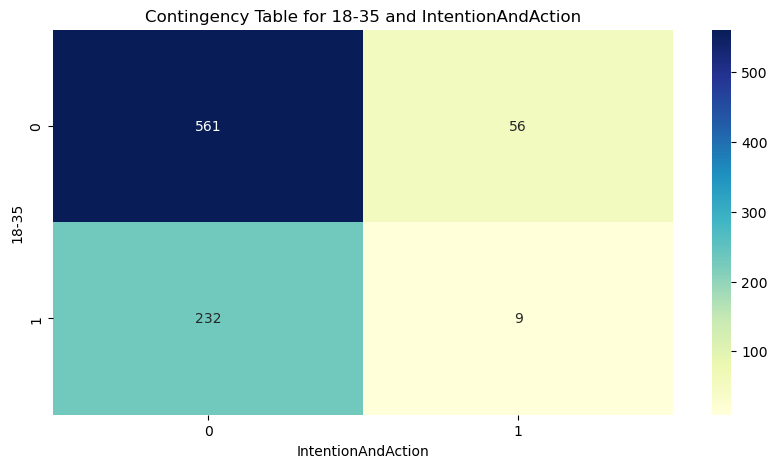


Chi-Square Test for White across groups:
Group: IntentionNoAction
Chi-Square Statistic: 2.1001, p-value: 0.1473


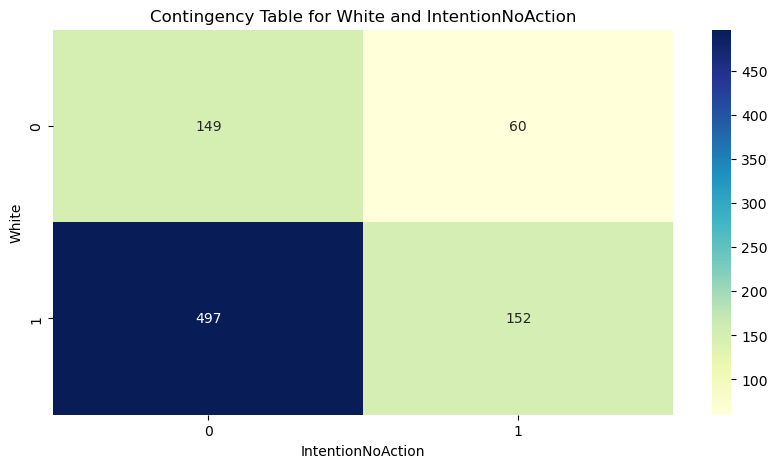

Group: NoIntentionNoAction
Chi-Square Statistic: 7.7643, p-value: 0.0053


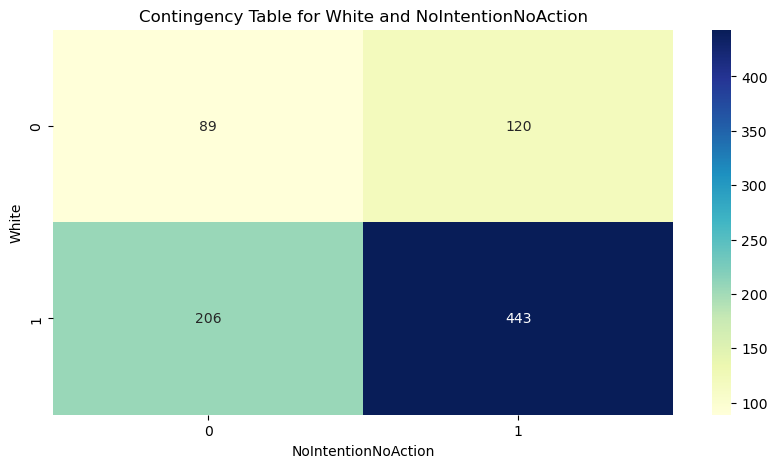

Group: IntentionAndAction
Chi-Square Statistic: 2.9009, p-value: 0.0885


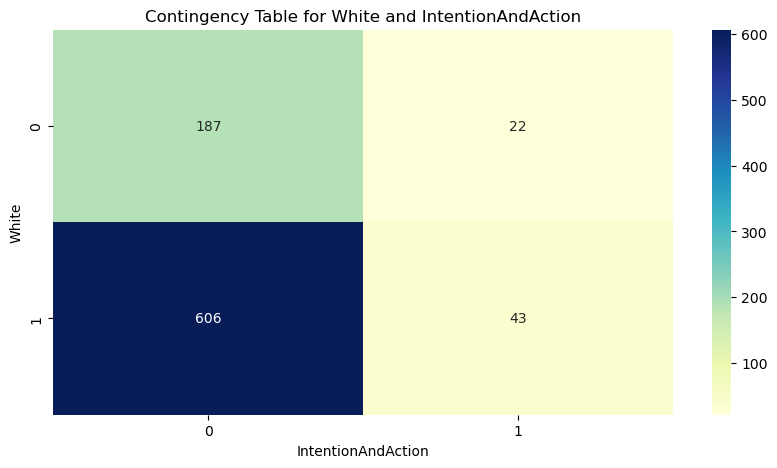


Chi-Square Test for African American across groups:
Group: IntentionNoAction
Chi-Square Statistic: 3.0594, p-value: 0.0803


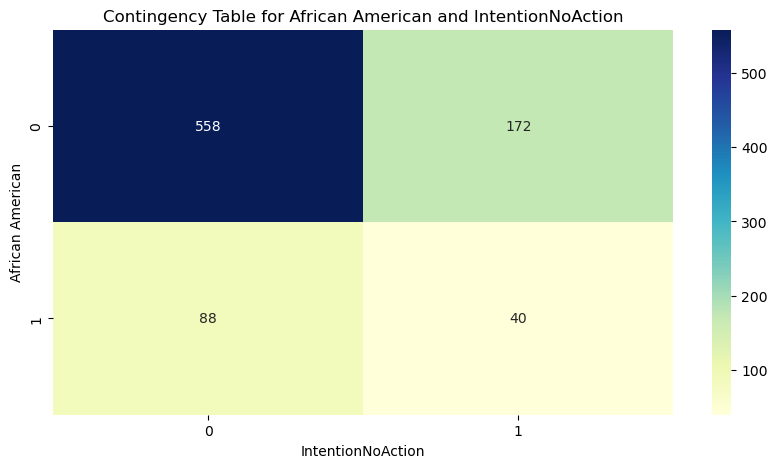

Group: NoIntentionNoAction
Chi-Square Statistic: 4.4793, p-value: 0.0343


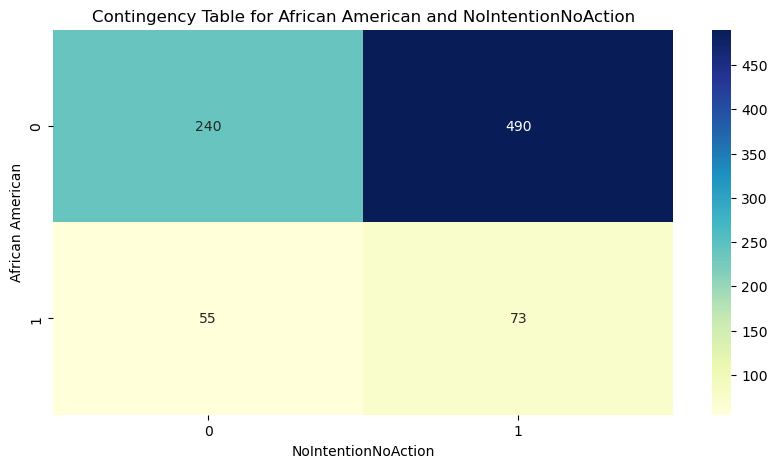

Group: IntentionAndAction
Chi-Square Statistic: 0.0846, p-value: 0.7712


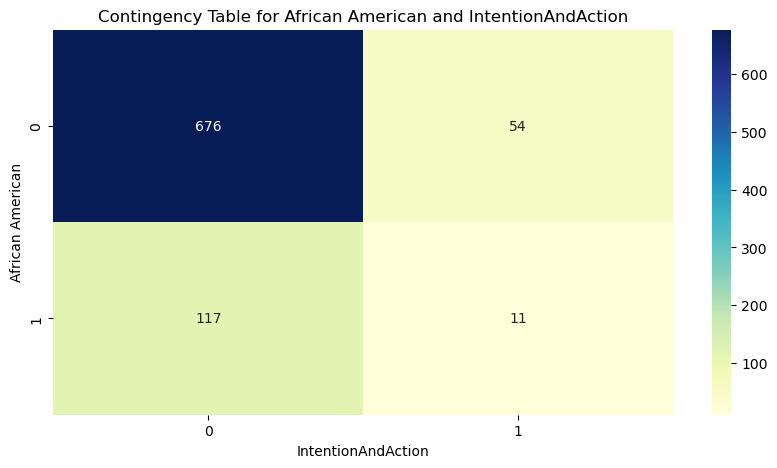


Chi-Square Test for USH across groups:
Group: IntentionNoAction
Chi-Square Statistic: 0.3440, p-value: 0.5575


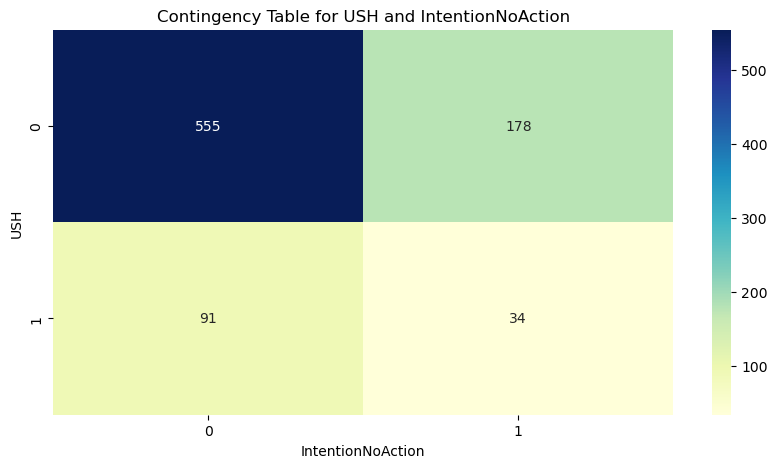

Group: NoIntentionNoAction
Chi-Square Statistic: 1.2657, p-value: 0.2606


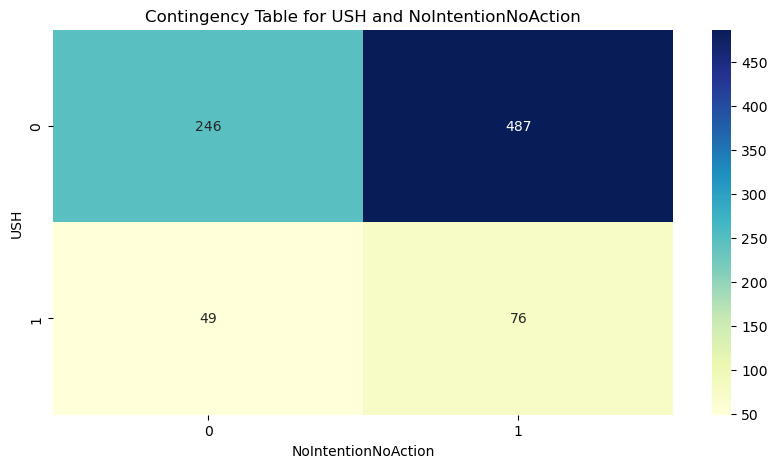

Group: IntentionAndAction
Chi-Square Statistic: 0.0000, p-value: 1.0000


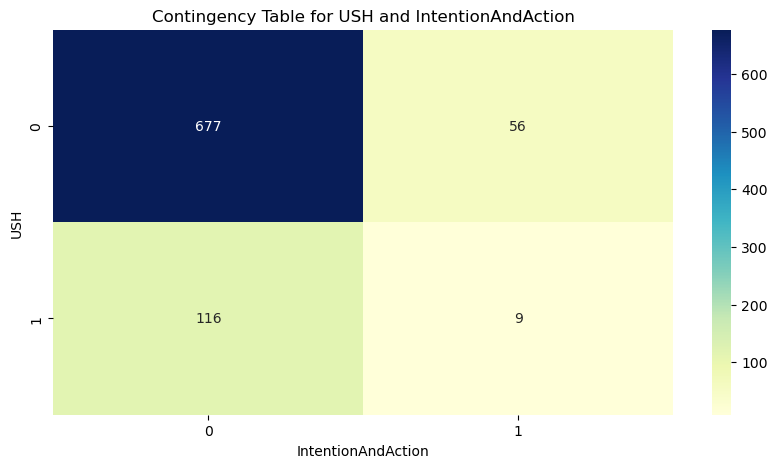


Chi-Square Test for Parental Status across groups:
Group: IntentionNoAction
Chi-Square Statistic: 3.5954, p-value: 0.0579


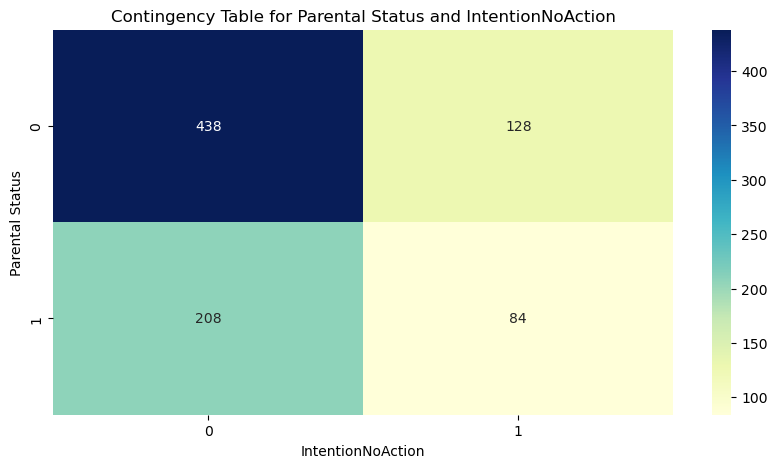

Group: NoIntentionNoAction
Chi-Square Statistic: 2.3491, p-value: 0.1254


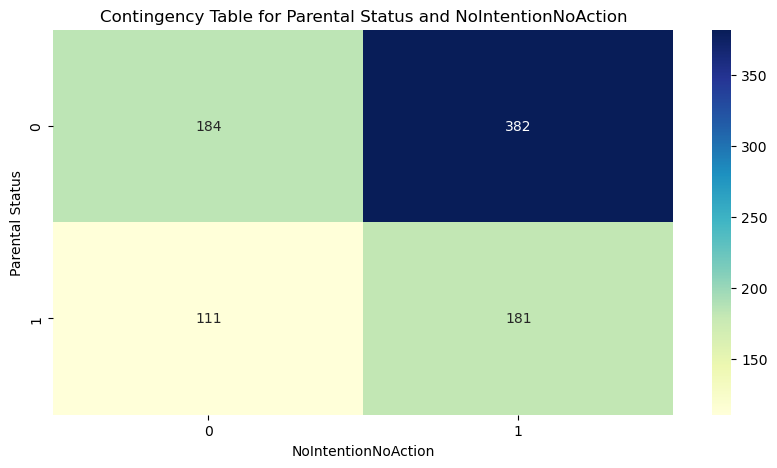

Group: IntentionAndAction
Chi-Square Statistic: 0.0286, p-value: 0.8657


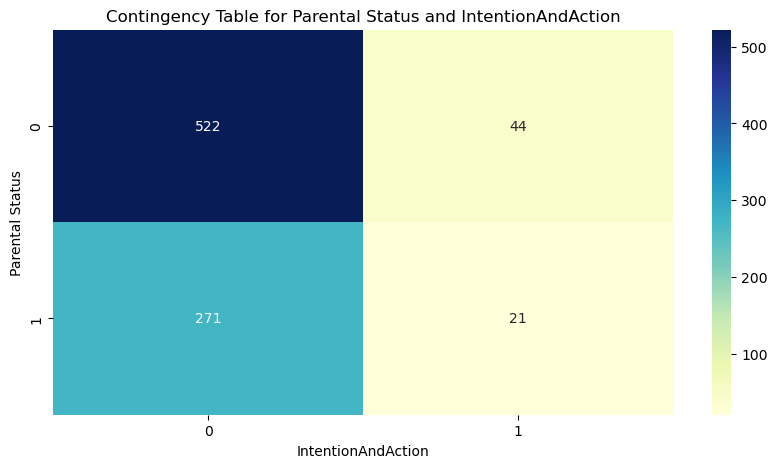


Chi-Square Test for Education across groups:
Group: IntentionNoAction
Chi-Square Statistic: 4.8577, p-value: 0.1825


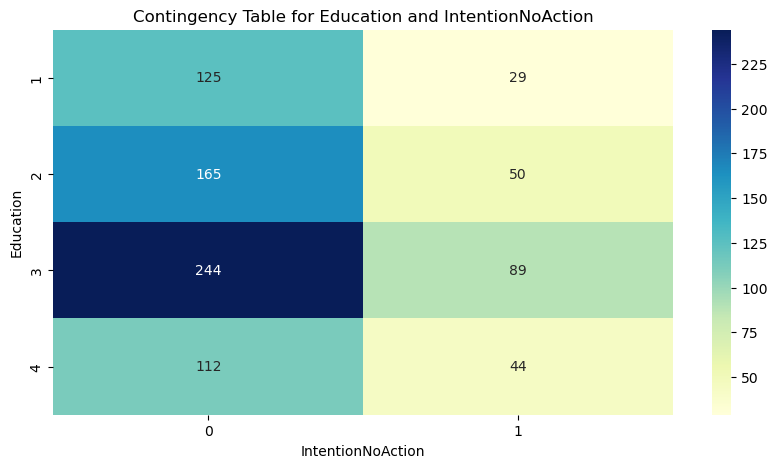

Group: NoIntentionNoAction
Chi-Square Statistic: 15.4687, p-value: 0.0015


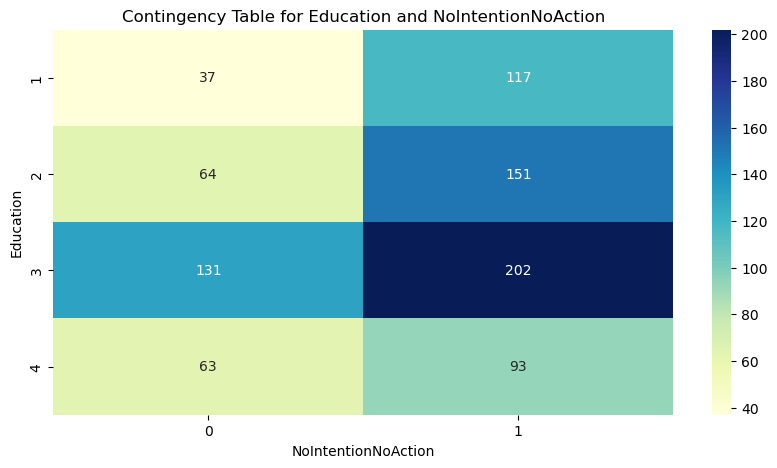

Group: IntentionAndAction
Chi-Square Statistic: 14.1672, p-value: 0.0027


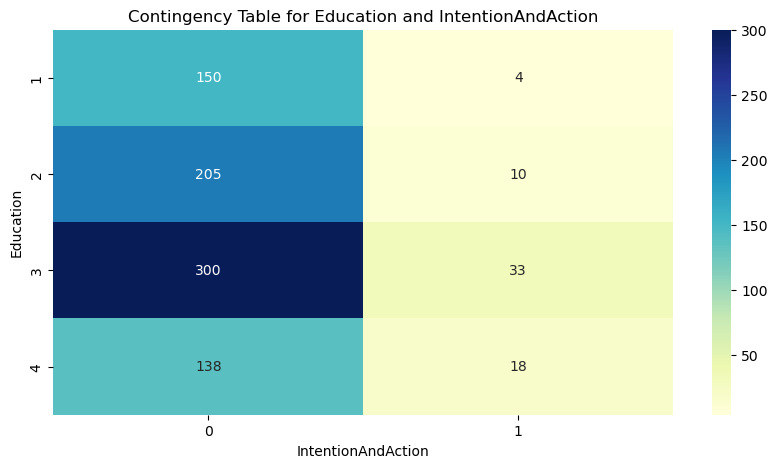


Chi-Square Test for Climate Change Impact across groups:
Group: IntentionNoAction
Chi-Square Statistic: 42.5041, p-value: 0.0000


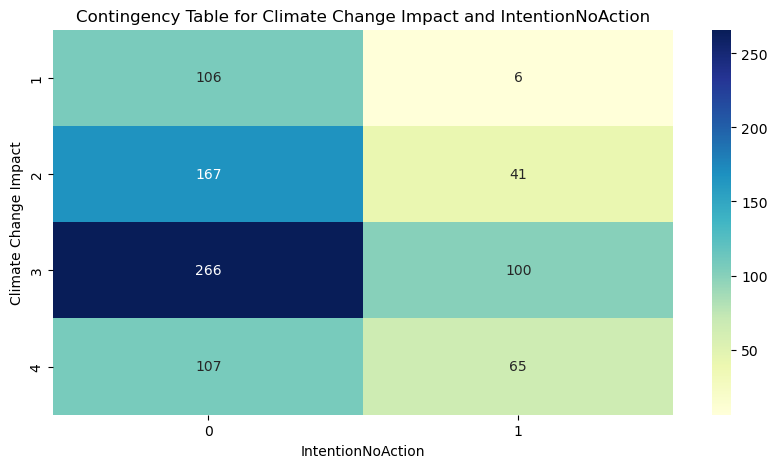

Group: NoIntentionNoAction
Chi-Square Statistic: 85.5603, p-value: 0.0000


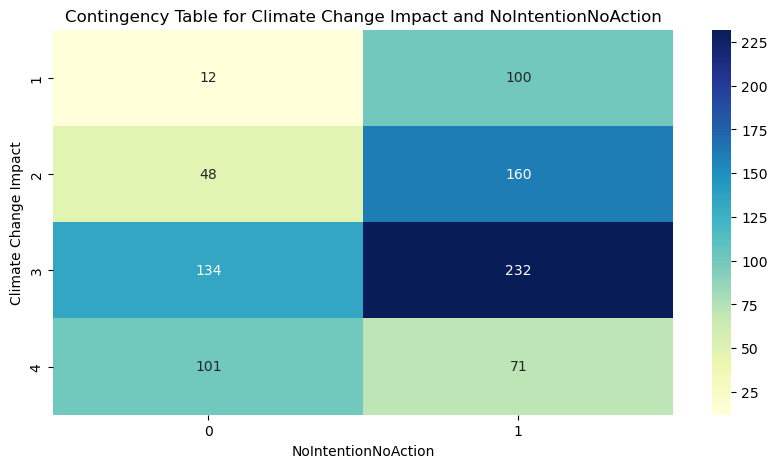

Group: IntentionAndAction
Chi-Square Statistic: 33.9033, p-value: 0.0000


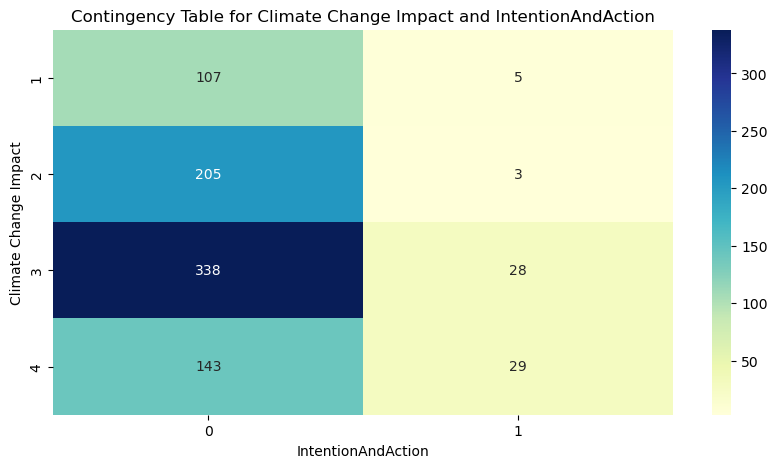


Chi-Square Test for Level of action across groups:
Group: IntentionNoAction
Chi-Square Statistic: 18.2150, p-value: 0.0004


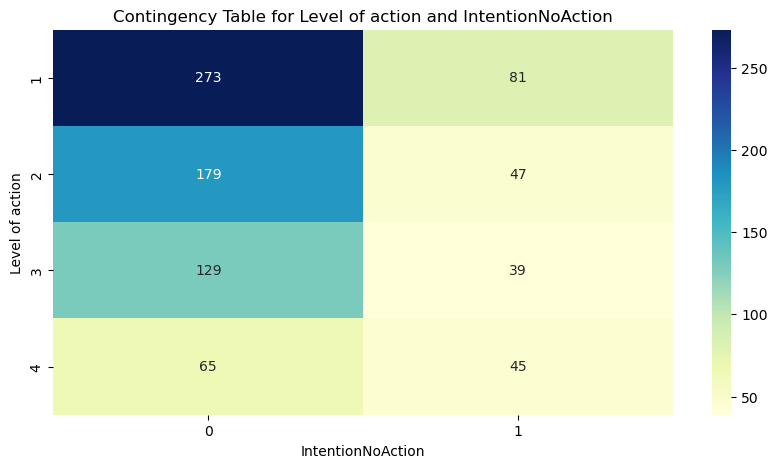

Group: NoIntentionNoAction
Chi-Square Statistic: 55.3251, p-value: 0.0000


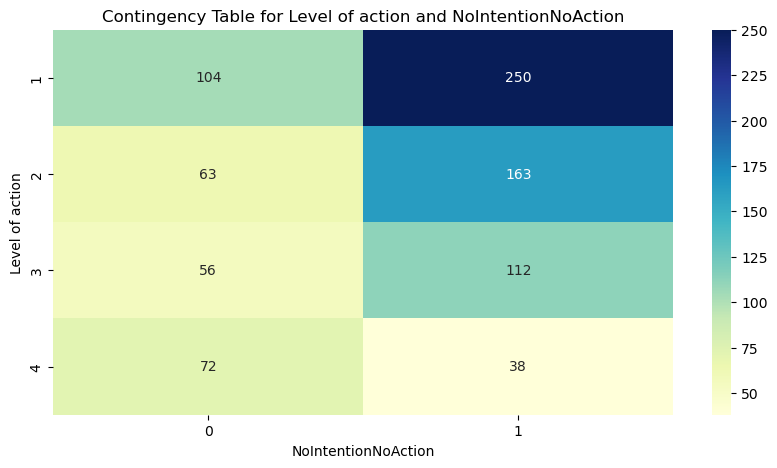

Group: IntentionAndAction
Chi-Square Statistic: 40.5929, p-value: 0.0000


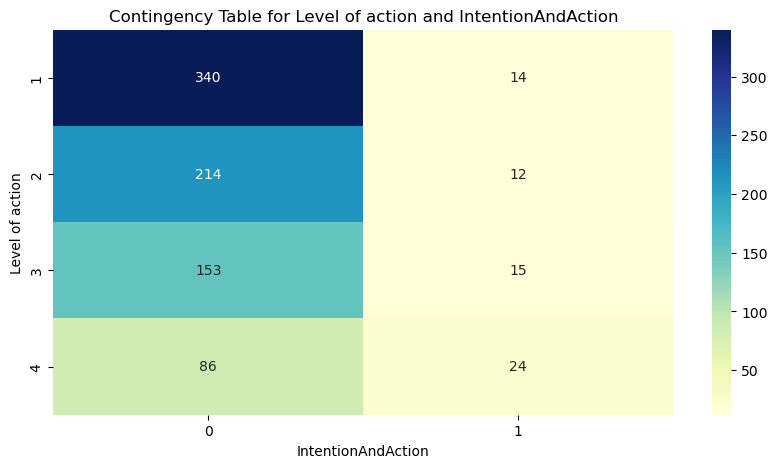

In [15]:
# Define the groups as columns
groups = ['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction']

# Define the sociodemographic variables
socio_vars = ['Female', '18-35', "White", "African American", "USH", "Parental Status", 'Education', 'Climate Change Impact', 'Level of action']

# Dictionary to store results
results = {}

for var in socio_vars:
    print(f"\nChi-Square Test for {var} across groups:")
    for group in groups:
        # Create contingency table for each group column
        contingency_table = pd.crosstab(df[var], df[group])
        
        # Perform Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Check expected frequencies
        if (expected < 5).any():
            print(f"Warning: Low expected frequencies in contingency table for {var} and {group}")
        
        # Store results
        results[(var, group)] = {
            'Chi-Square Statistic': chi2_stat,
            'p-value': p_value
        }
        
        # Print results
        print(f'Group: {group}')
        print(f'Chi-Square Statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}')
        
        # Plot the contingency table
        plt.figure(figsize=(10, 5))
        sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
        plt.title(f'Contingency Table for {var} and {group}')
        plt.ylabel(f'{var}')
        plt.xlabel(f'{group}')
        plt.show()



### Proportions of each variable within each group

In [17]:
# Dictionary to store proportions results
proportions_results = {}

for var in socio_vars:
    for group in groups:
        # Filter the DataFrame for the current group
        group_df = df[df[group] == 1]
        
        # Calculate the frequency distribution for the current variable
        frequency_dist = group_df[var].value_counts(normalize=True)
        
        # Store the proportions
        proportions_results[(var, group)] = frequency_dist

# Print proportions results
print("\nProportions of each variable within each group:")
for key, value in proportions_results.items():
    print(f"\nProportions for {key[0]} and {key[1]}:")
    print(value)


Proportions of each variable within each group:

Proportions for Female and IntentionNoAction:
1    0.542453
0    0.457547
Name: Female, dtype: float64

Proportions for Female and NoIntentionNoAction:
1    0.548845
0    0.451155
Name: Female, dtype: float64

Proportions for Female and IntentionAndAction:
1    0.615385
0    0.384615
Name: Female, dtype: float64

Proportions for 18-35 and IntentionNoAction:
0    0.641509
1    0.358491
Name: 18-35, dtype: float64

Proportions for 18-35 and NoIntentionNoAction:
0    0.738899
1    0.261101
Name: 18-35, dtype: float64

Proportions for 18-35 and IntentionAndAction:
0    0.861538
1    0.138462
Name: 18-35, dtype: float64

Proportions for White and IntentionNoAction:
1    0.716981
0    0.283019
Name: White, dtype: float64

Proportions for White and NoIntentionNoAction:
1    0.786856
0    0.213144
Name: White, dtype: float64

Proportions for White and IntentionAndAction:
1    0.661538
0    0.338462
Name: White, dtype: float64

Proportions for A